In [2]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import (
    PolynomialFeatures,
    OneHotEncoder
)
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')



In [3]:
train_test2 = pd.read_csv('../../data/daily_sunspots_time_series_1850-01_2024-05.csv')

In [4]:
train_test2

,date,year,month,day,date_frac,counts,std,nobs,indicator
0,1850-01-01,1850,1,1,1850.001,253,19.6,1,NaN
1,1850-01-02,1850,1,2,1850.004,162,15.5,1,NaN
2,1850-01-03,1850,1,3,1850.007,217,18.1,1,NaN
3,1850-01-04,1850,1,4,1850.010,99,12.0,1,NaN
4,1850-01-05,1850,1,5,1850.012,108,12.6,1,NaN
...,...,...,...,...,...,...,...,...,...
63668,2024-04-26,2024,4,26,2024.318,141,29.9,30,*
63669,2024-04-27,2024,4,27,2024.321,139,25.9,29,*
63670,2024-04-28,2024,4,28,2024.324,119,22.0,25,*
63671,2024-04-29,2024,4,29,2024.327,100,15.3,38,*


In [5]:
train_test2 = train_test2[['date','day','month','year','counts']]

In [6]:
train_test2

,date,day,month,year,counts
0,1850-01-01,1,1,1850,253
1,1850-01-02,2,1,1850,162
2,1850-01-03,3,1,1850,217
3,1850-01-04,4,1,1850,99
4,1850-01-05,5,1,1850,108
...,...,...,...,...,...
63668,2024-04-26,26,4,2024,141
63669,2024-04-27,27,4,2024,139
63670,2024-04-28,28,4,2024,119
63671,2024-04-29,29,4,2024,100


In [7]:
11*365

4015

In [8]:
train2 = train_test2.iloc[:-4015]
test2 = train_test2.iloc[-4015:]

In [9]:
train2

,date,day,month,year,counts
0,1850-01-01,1,1,1850,253
1,1850-01-02,2,1,1850,162
2,1850-01-03,3,1,1850,217
3,1850-01-04,4,1,1850,99
4,1850-01-05,5,1,1850,108
...,...,...,...,...,...
59653,2013-04-29,29,4,2013,141
59654,2013-04-30,30,4,2013,150
59655,2013-05-01,1,5,2013,142
59656,2013-05-02,2,5,2013,104


In [10]:
train2['date'] = pd.to_datetime(train2['date'])

In [11]:
train2.set_index(train2['date'], inplace = True)

In [14]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59658 entries, 1850-01-01 to 2013-05-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    59658 non-null  datetime64[ns]
 1   day     59658 non-null  int64         
 2   month   59658 non-null  int64         
 3   year    59658 non-null  int64         
 4   counts  59658 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 2.7 MB


In [15]:
seas_decomp_train2_11years = seasonal_decompose(
    x=train2['counts'], 
    model='additive', 
    two_sided=True,
    period= 365*11)

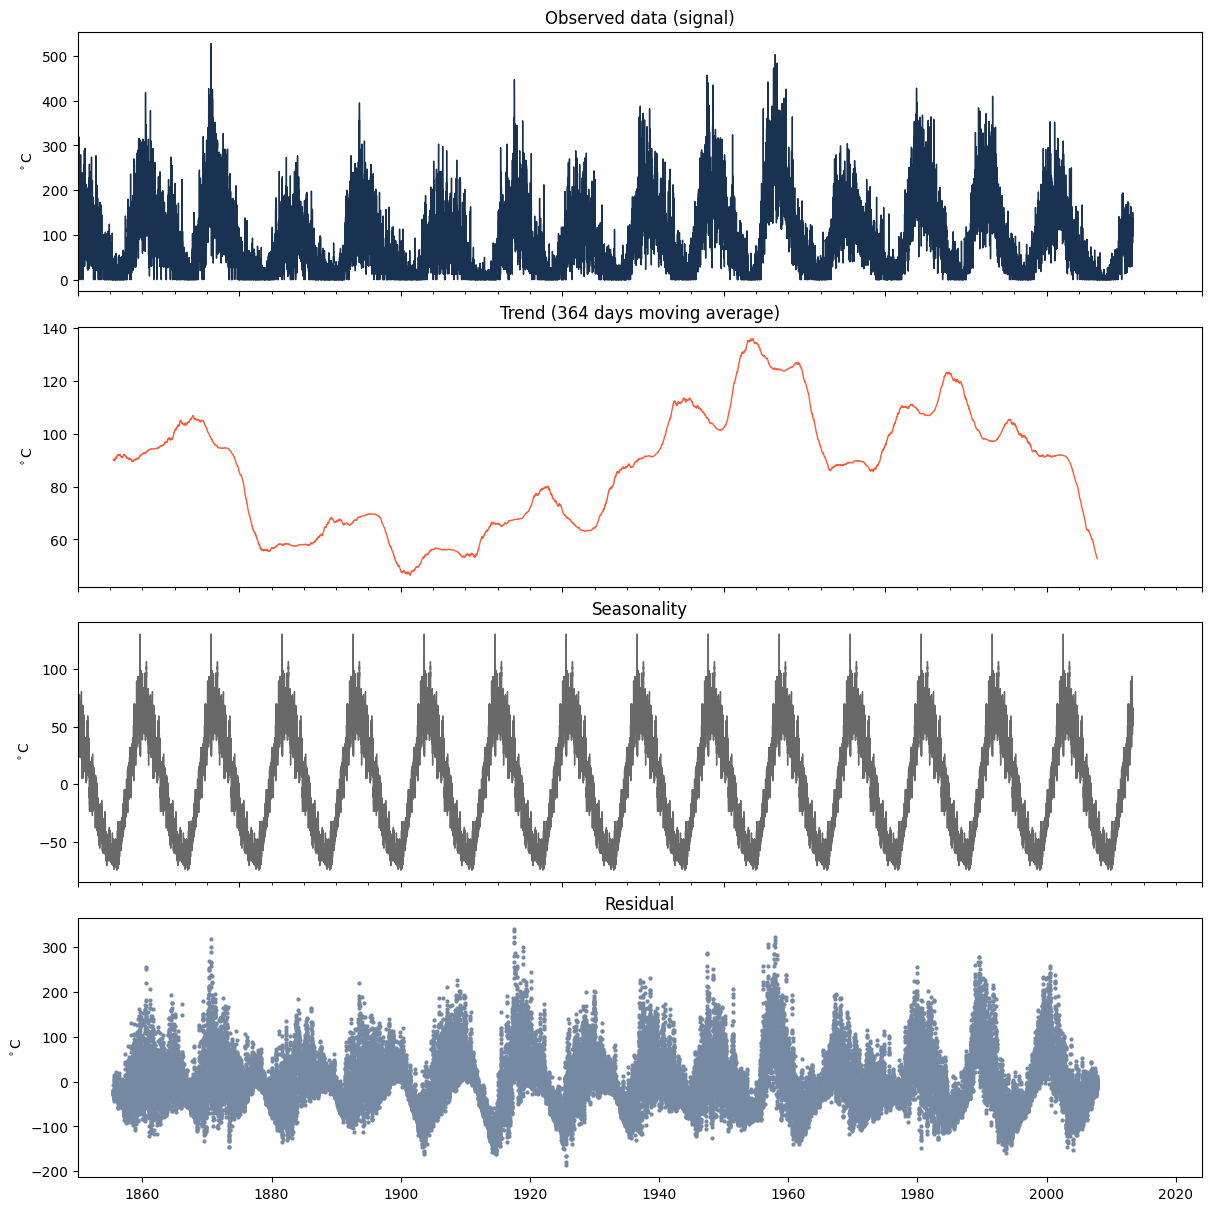

In [16]:
# Plots:
fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)

cmaps_hex = ['#193251','#FF5A36','#696969', '#7589A2','#FF5A36', '#DB6668']
sns_c = sns.color_palette(palette=cmaps_hex)


#Plot Signal
ax[0].set(title='Observed data (signal)', 
          ylabel=r'$^\circ$C')
seas_decomp_train2_11years.observed.plot(color=sns_c[0], 
                              linewidth=1,
                              sharex=True,
                              ax=ax[0])
#Plot Trend
ax[1].set(title='Trend (364 days moving average)', 
          ylabel=r'$^\circ$C')
seas_decomp_train2_11years.trend.plot(color=sns_c[1], 
                              linewidth=1,
                              sharex=True,
                              ax=ax[1])
#Plot Seasonality
ax[2].set(title='Seasonality', 
          ylabel=r'$^\circ$C')
seas_decomp_train2_11years.seasonal.plot(
                                color=sns_c[2], 
                                linewidth=1,
                                sharex=True,
                                ax=ax[2])
#Plot residual
ax[3].set(title='Residual', 
          ylabel=r'$^\circ$C');
ax[3].scatter(
    x=seas_decomp_train2_11years.resid.index,
    y=seas_decomp_train2_11years.resid,
    color=sns_c[3],
    s=4)

for i in range(4):
    ax[i].set_xlim(pd.to_datetime("1850"),pd.to_datetime("2024"))
    
# fig.savefig("visualisations/Basel_Temp_TSA_decomp.png",dpi=300)